<a href="https://colab.research.google.com/github/shyamjith94/PyTorch/blob/main/CnnMNISTFashionDataImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
%%capture
!pip install torch torchvision
!!pip install ipython

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch, torchvision
import torch.nn as NN
import torch.nn.functional as F

from sklearn.metrics import confusion_matrix
from torchvision.utils import make_grid

In [104]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

In [105]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

In [106]:
transform = transforms.ToTensor()

In [107]:
train_data = datasets.FashionMNIST(root='/content/drive/MyDrive/PyTorch/Data/FashionMnistDownloadme', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='/content/drive/MyDrive/PyTorch/Data/FashionMnistDownloadme', train=False, download=True, transform=transform)

In [108]:
class_names = ['T-shirts', 'Trouser', 'Sweater', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

In [109]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [110]:
for image, label in train_loader:
    break

In [111]:
image.shape

torch.Size([10, 1, 28, 28])

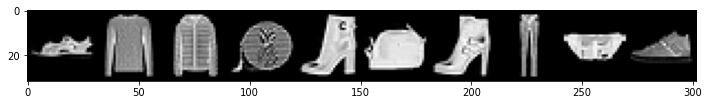

In [112]:
im = make_grid(image, nrow=10)
plt.figure(figsize=(12, 4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))


In [113]:

# loosing size due to filter
conv = NN.Conv2d(1, 1, 5, 1)
x = conv(image)
print(f"Orginal size {image.shape}")
print(f"down size {x.shape}") 

Orginal size torch.Size([10, 1, 28, 28])
down size torch.Size([10, 1, 24, 24])


In [114]:
x = F.max_pool2d(x, 2, 2)
print(f"Down size {x.shape}")

Down size torch.Size([10, 1, 12, 12])


In [115]:
(((24-2)/2)-2)/2

4.5

In [116]:
class ConvoluationalNetWork(NN.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = NN.Conv2d(1, 6, 3, 1)
        self.conv2 = NN.Conv2d(6, 16, 3, 1)
        self.fc1 = NN.Linear(5*5*16, 100)
        self.fc2 = NN.Linear(100, 10)


    def forward(self, X):
        # X = F.relu(self.conv1(X))
        # X = F.max_pool2d(X, 2, 2)
        
        # X = F.relu(self.conv2(X))
        # X = F.max_pool2d(X, 2, 2)

        # X = X.view(-1, 5*5*16)
        # X = F.relu(self.fc1(X))
        # X = self.fc2(X)
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)

        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)
        

In [117]:
torch.manual_seed(101)
model = ConvoluationalNetWork()

In [118]:
model

ConvoluationalNetWork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [119]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
40000
100
1000
10


In [120]:
criterion = NN.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [101]:

epochs = 5

for i in range(epochs):
    for X_train, y_train in train_loader:

        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # OPTIONAL print statement
    print(f'{i+1} of {epochs} epochs completed')


1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed
5 of 5 epochs completed
